In [1]:
import pandas as pd # data manipulation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil, floor 

In [79]:
filepath1 = './dataset/WA_Fn-UseC_-Sales-Win-Loss.csv'
filepath2 = './dataset/earthquake_data_tsunami.csv'
filepath3 = './dataset/Global finance data.csv'
filepath4 = './dataset/Sales Transaction v.4a.csv'

df = pd.read_csv(filepath4)
df.head()

,TransactionNo,Date,Date.1,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,12/9/2019 0:00,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,12/9/2019 0:00,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,12/9/2019 0:00,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,12/9/2019 0:00,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,12/9/2019 0:00,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [80]:
df.dtypes

TransactionNo     object
Date              object
Date.1            object
ProductNo         object
ProductName       object
Price            float64
Quantity           int64
CustomerNo       float64
Country           object
dtype: object

In [81]:
# Defining function to set figure size
def figure(a,b):
    sns.set(rc={'figure.figsize':(a,b)})

In [82]:
df.head()

,TransactionNo,Date,Date.1,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,12/9/2019 0:00,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,12/9/2019 0:00,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,12/9/2019 0:00,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,12/9/2019 0:00,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,12/9/2019 0:00,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


## Categorical Variables

### Display

In [83]:
df_string = df.loc[:,df.dtypes == 'object']
print(df_string.head().to_string())


  TransactionNo       Date          Date.1 ProductNo                          ProductName         Country
0        581482  12/9/2019  12/9/2019 0:00     22485        Set Of 2 Wooden Market Crates  United Kingdom
1        581475  12/9/2019  12/9/2019 0:00     22596  Christmas Star Wish List Chalkboard  United Kingdom
2        581475  12/9/2019  12/9/2019 0:00     23235             Storage Tin Vintage Leaf  United Kingdom
3        581475  12/9/2019  12/9/2019 0:00     23272    Tree T-Light Holder Willie Winkie  United Kingdom
4        581475  12/9/2019  12/9/2019 0:00     23239    Set Of 4 Knick Knack Tins Poppies  United Kingdom


### Display

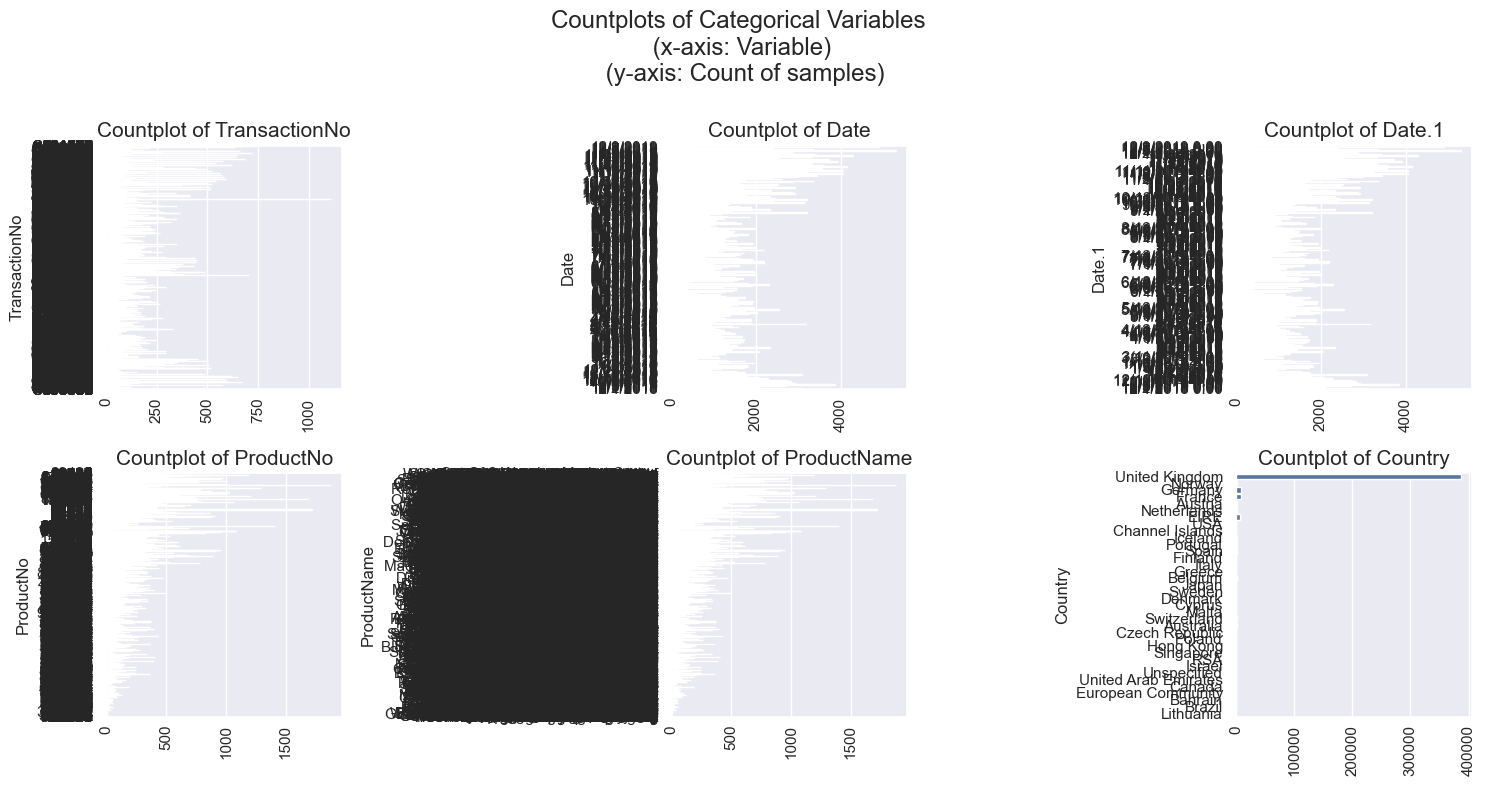

In [84]:
if df_string.empty != True:

    plt_cols = 3                                                           # Customized no. of columns in subplot
    plt_rows = ceil(len(df_string.columns)/plt_cols)                       # Set the no. of rows in subplot by dividing: 
                                                                        #  roundup(no. of variables / no. of columns)
    figure(15, plt_rows * 4)      
    fig, axes = plt.subplots(plt_rows,plt_cols)
    fig.suptitle("Countplots of Categorical Variables \n (x-axis: Variable) \n (y-axis: Count of samples)", 
                fontsize="x-large")
    axes = axes.ravel()

    for i in range(0, len(df_string.columns)):
        sns.countplot(df_string.iloc[:,i], ax=axes[i])                     # Plot countplot for each categorical variable
        axes[i].set_title('Countplot of ' + df_string.columns[i], size=15) # Set title of every subplot
        axes[i].tick_params(axis='x', labelrotation=90, pad=0)             # Rotate x-axis of every subplot
        axes[i].set_xlabel('')                                             # Turn off subplots' x-axis titles for tidiness
    fig.tight_layout(rect=[0, 0, 1, 0.98])                                 # Adjust tight_layout to accommodate suptitle


## Numerical variables

### Display

In [85]:
df_numeric0 = df.loc[:, df.dtypes!='object']
df_numeric0.head()

,Price,Quantity,CustomerNo
0,21.47,12,17490.0
1,10.65,36,13069.0
2,11.53,12,13069.0
3,10.65,12,13069.0
4,11.94,6,13069.0


In [86]:
df_numeric0 = df.loc[:, df.dtypes!='object']

# Check presence of Index / index 
#  and drop those columns
id_cols = ['Index', 'index']
df_numeric = df_numeric0.loc[:, ~df_numeric0.columns.isin(id_cols)]
    
print(df_numeric.head().to_string())
print('')

# Check presence of Index / index 
#  columns to be removed
id_col = ['Index', 'index']

print('Numeric columns:')
for i in df_numeric.columns:
    if i in id_col:
        df_numeric = df_numeric.drop(labels='Index',axis=1)
    print(i)
print('')

   Price  Quantity  CustomerNo
0  21.47        12     17490.0
1  10.65        36     13069.0
2  11.53        12     13069.0
3  10.65        12     13069.0
4  11.94         6     13069.0

Numeric columns:
Price
Quantity
CustomerNo



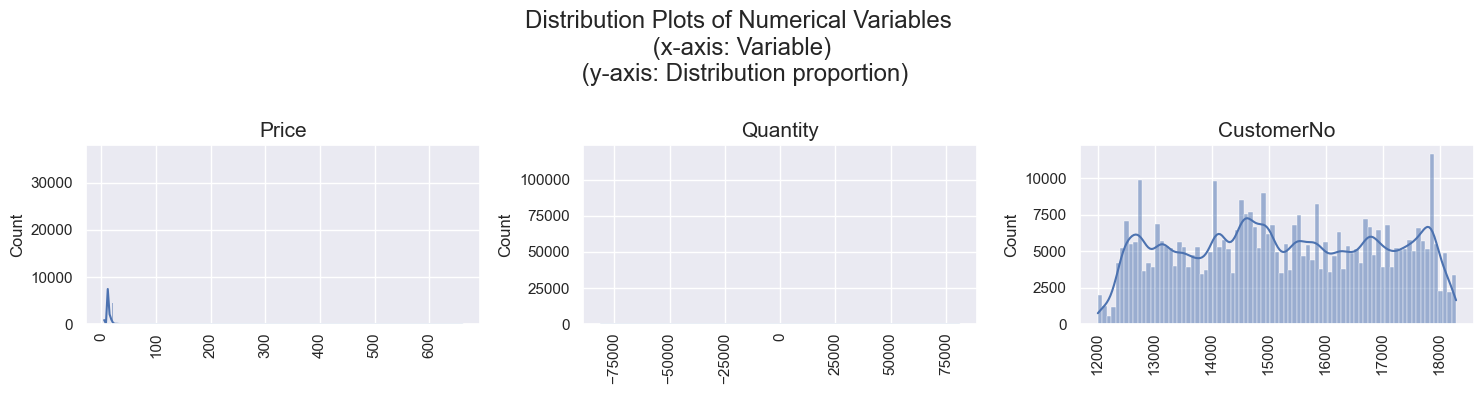

In [87]:
if df_numeric.empty != True:
    
    plt_cols = 3                                                           # Customized no. of columns in subplot
    plt_rows = ceil(len(df_numeric.columns)/plt_cols)                       # Set the no. of rows in subplot by dividing: 
                                                                        #  roundup(no. of variables / no. of columns)
    figure(15,plt_rows * 4)    
    fig, axes = plt.subplots(plt_rows,plt_cols)
    fig.suptitle("Distribution Plots of Numerical Variables \n (x-axis: Variable) \n (y-axis: Distribution proportion)", 
                fontsize="x-large")

    axes = axes.ravel()

    for i in range(0, len(df_numeric.columns)):
        sns.histplot(df_numeric.iloc[:,i], kde=True, ax=axes[i])                     # Plot countplot for each categorical variable
        axes[i].set_title(df_numeric.columns[i], size=15) # Set title of every subplot
        axes[i].tick_params(axis='x', labelrotation=90, pad=0)             # Rotate x-axis of every subplot
        axes[i].set_xlabel('')                                             # Turn off subplots' x-axis titles for tidiness
    fig.tight_layout(rect=[0, 0, 1, 0.98])                                 # Adjust tight_layout to accommodate suptitle

    plt.show()

In [88]:
# fig, axs = plt.subplots(2,5, figsize=(15, 6), facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = .5, wspace=.001)

# axs = axs.ravel()

# for i in range(10):
#     axs[i].contourf(np.random.rand(10,10),5,cmap=plt.cm.Oranges)
#     axs[i].set_title(str(250+i))

In [89]:
## **************************************** ##

In [90]:
stop

NameError: name 'stop' is not defined

## Original Code

In [ ]:
figure(15,8)

plt_cols = 3 # set the no. of columns in subplot
# set the no. of rows in subplot by dividing no. of cols and round up
plt_rows = ceil((len(df_string.columns)+1)/plt_cols)  

i=0
for i in range(0, len(df_string.columns), 1):
    plt.subplot(plt_rows,plt_cols,i+1)
    sns.countplot(df_string.iloc[:,i])
    plt.title('Countplot of ' + df_string.columns[i])
    plt.xticks(rotation=45)
    plt.subplots_adjust(bottom=0.01)
    plt.tick_params(labelsize=8, pad=0)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=2, 
                    wspace=0.4, 
                    hspace=0.4)
    i += 1

In [ ]:
plt.show()

C:\Users\atirazmi\AppData\Local\Temp\ipykernel_18548\3790295403.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_numeric.iloc[:,i])
C:\Users\atirazmi\AppData\Local\Temp\ipykernel_18548\3790295403.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_numeric.iloc[:,i])
C:\Users\atirazmi\

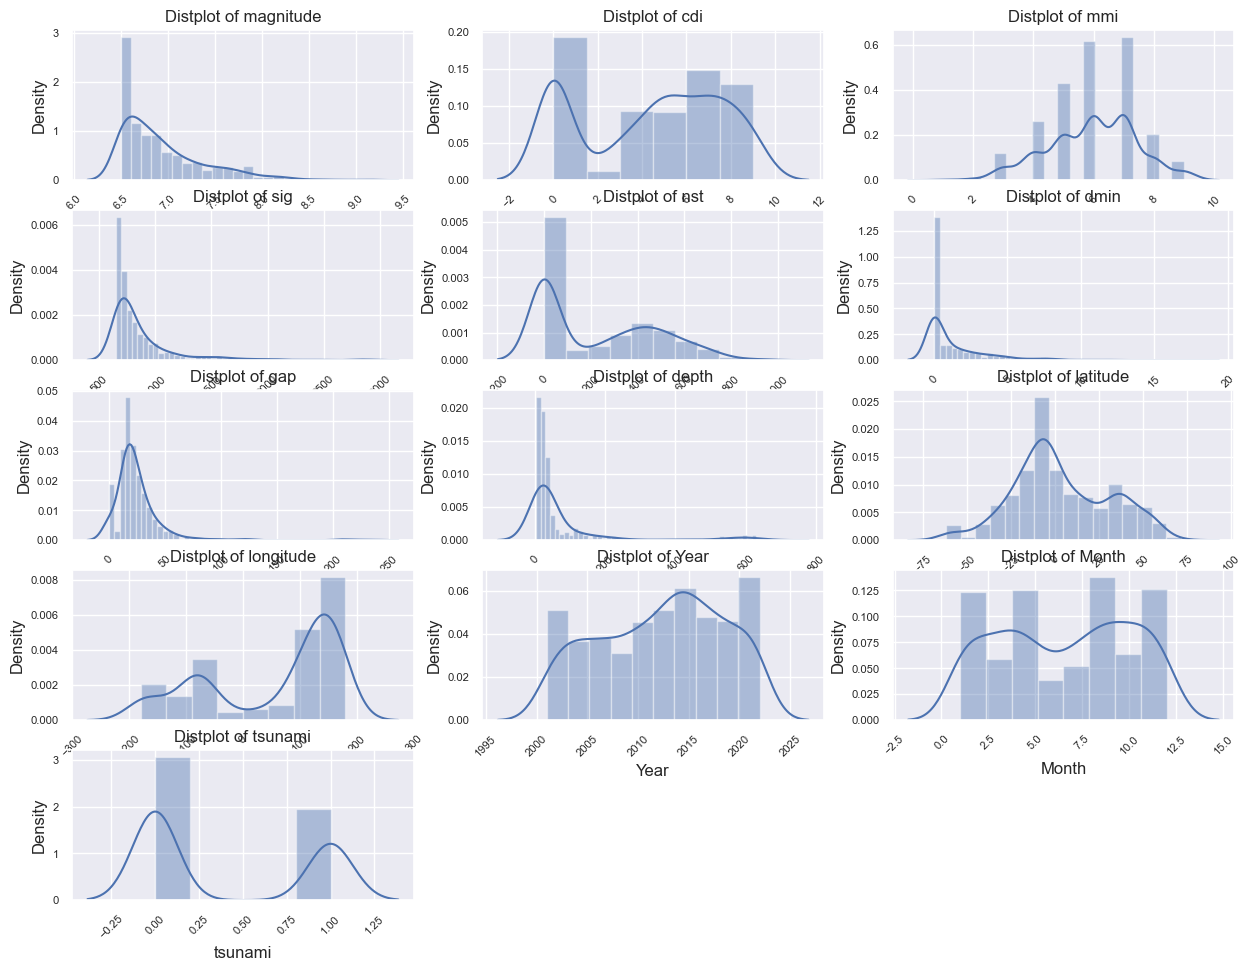

In [ ]:
figure(15,10)

plt_cols = 3 # set the no. of columns in subplot
# set the no. of rows in subplot by dividing no. of cols and round up
plt_rows = ceil((len(df_numeric.columns)+1)/plt_cols)  

i=0
for i in range(0, len(df_numeric.columns), 1):
    plt.subplot(plt_rows,plt_cols,i+1)
    sns.distplot(df_numeric.iloc[:,i])
    plt.title('Distplot of ' + df_numeric.columns[i])
    plt.xticks(rotation=45)
    plt.subplots_adjust(bottom=0.01)
    plt.tick_params(labelsize=8)
    i += 1

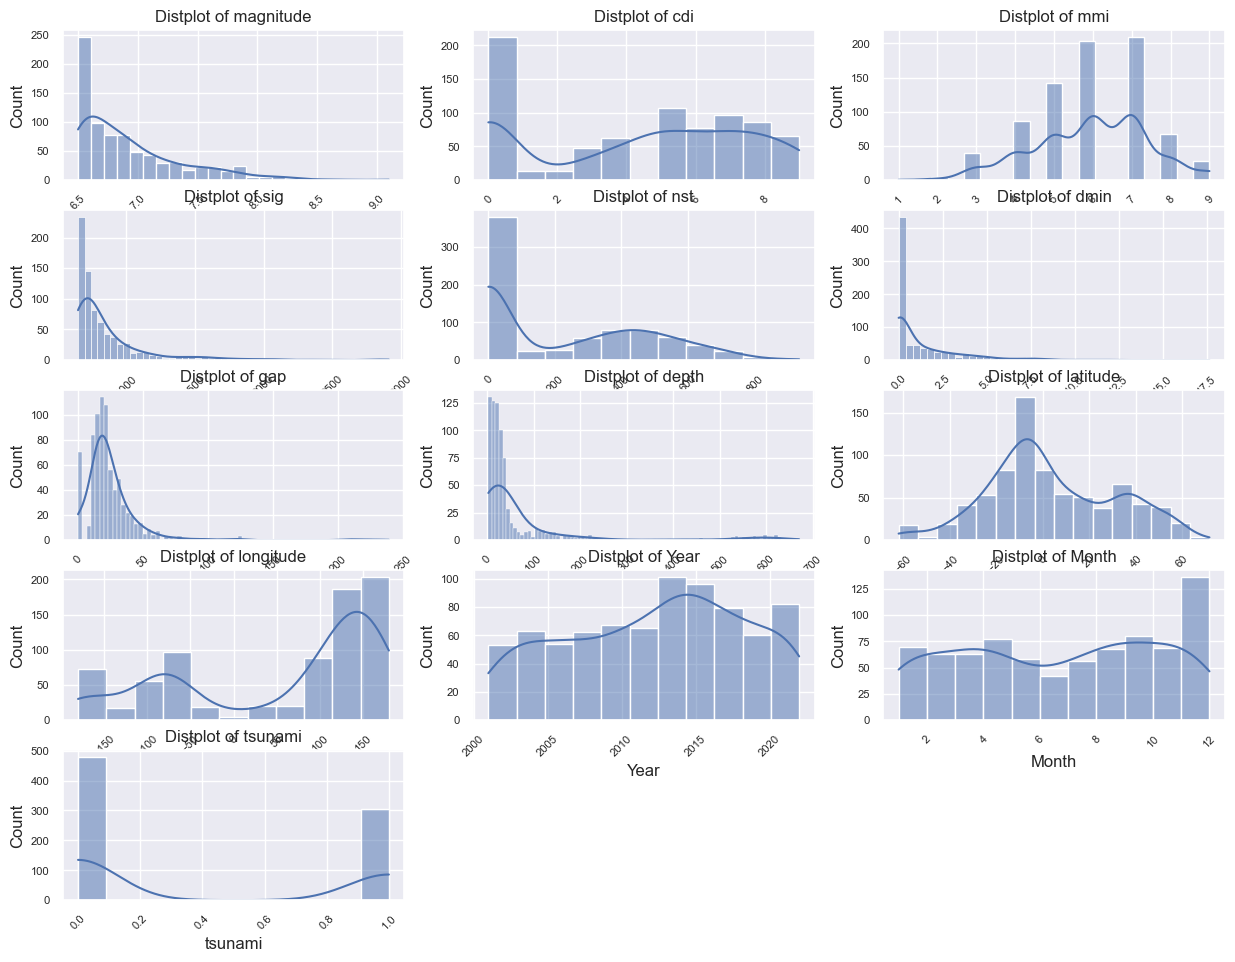

In [ ]:
figure(15,10)

plt_cols = 3 # set the no. of columns in subplot
# set the no. of rows in subplot by dividing no. of cols and round up
plt_rows = ceil((len(df_numeric.columns)+1)/plt_cols)  

i=0
for i in range(0, len(df_numeric.columns), 1):
    plt.subplot(plt_rows,plt_cols,i+1)
    sns.histplot(df_numeric.iloc[:,i], kde=True)
    plt.title('Distplot of ' + df_numeric.columns[i])
    plt.xticks(rotation=45)
    plt.subplots_adjust(bottom=0.01)
    plt.tick_params(labelsize=8)
    i += 1

In [ ]:
import streamlit as st # web app

In [ ]:
st.title("Data Visualization Dashboard")

2025-10-11 17:04:52.573 
  command:

    streamlit run C:\Users\atirazmi\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()